In [4]:
from google.colab import files
x=files.upload()


Saving DV.csv to DV (1).csv


In [6]:
import pandas as pd

df = pd.read_csv('DV (1).csv')
df.head(5)
print(len(df['Flair']))


95762


In [7]:
flair_list=['Coronavirus','AskIndia','Non-Political','Policy/Economy','Business/Finance','Science/Technology','Sports','Politics','Food']
print(len(flair_list))

9


Below is a depiction of the distribution of the scores of all the posts collected. As we can see, a majority of the posts have scores that range from 0 to 1000. 

Text(0.5, 1.0, 'Distribution of the scores of each post')

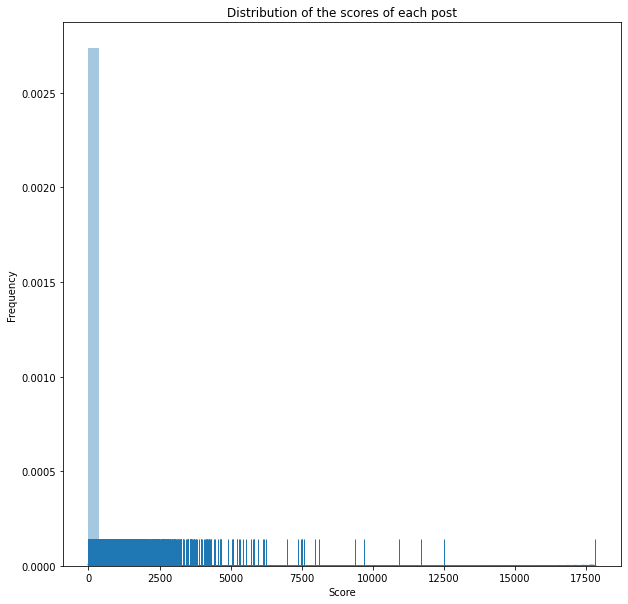

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
x=sns.distplot(df['Score'],kde=False, rug=False, ax=ax)
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title("Distribution of the scores of each post")

This is a histogram distribution of the upvote ratio of all the posts. The frequency of the upvote ratio clearly decreases progressively as the the upvote ratio itself decreases.

Text(0.5, 1.0, 'Upvote Ratio Frequency Distribution of the posts')

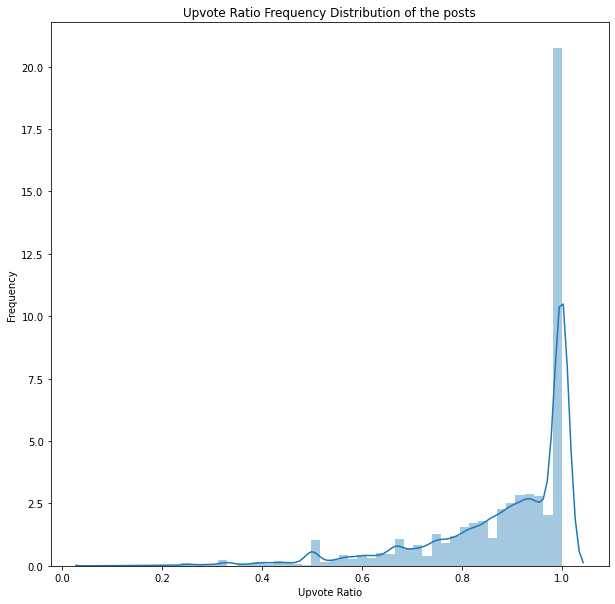

In [10]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y=sns.distplot(df['upvote_ratio'],kde=False,rug=False,ax=ax)
plt.xlabel('Upvote Ratio')
plt.ylabel('Frequency')
plt.title('Upvote Ratio Frequency Distribution of the posts')
#Histogram depiction of the upvote ratio of the posts collected

This is a plot depicting the relation between the upvote ratio and the score. As we can see, the posts with the highest scores generally tend to have high upvote ratios as well, whereas the posts with the lowest downvote ratios do not have a high score to begin with. Users can take down posts if they garner too much negative attention, so in a sense, our data is incomplete as it does not contain information on these posts. The posts with the highest upvote ratio also do not have score ranging beyond a score of 1300. 

Text(0.5, 1.0, 'Upvote Ratio vs Score')

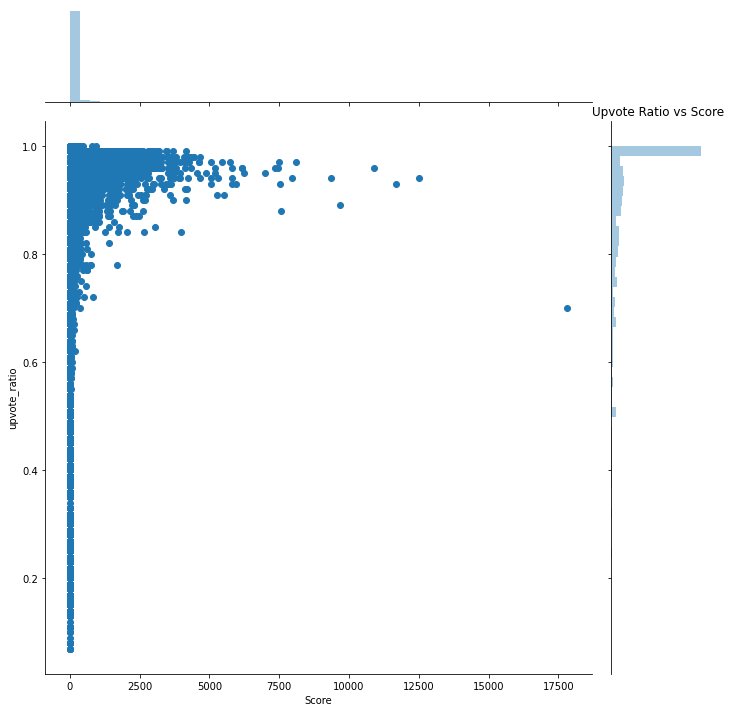

In [11]:
z=sns.jointplot(y=df['upvote_ratio'],x=df['Score'],data=df,kind='scatter',height=10)
plt.title('Upvote Ratio vs Score')

Posts with moderate to high upvote ratios tend to have a higher number of comments, as indicated by this graph


Text(0.5, 1.0, 'Upvote Ratio vs Number of comments')

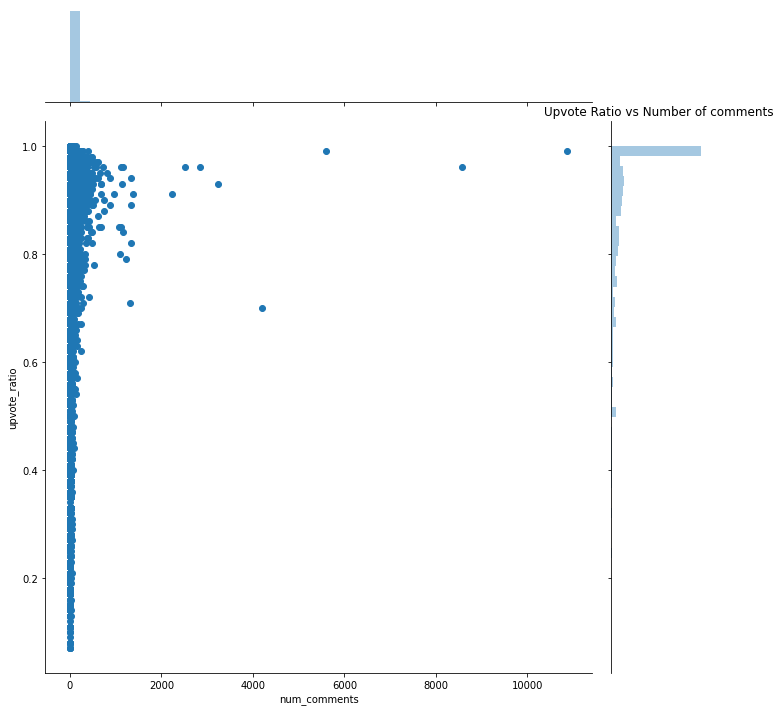

In [27]:
sns.jointplot(y=df['upvote_ratio'],x=df['num_comments'],data=df,kind='scatter',height=10)
plt.title('Upvote Ratio vs Number of comments')


This is an representation of the upvote ratio vs comments for each flair.

Some observations: 

Coronavirus: This flair has the least interaction between the users.

Food: Despite being the flair with the lowest posts in the dataset, it appears to be more diverse in terms of the views and interactions between users, with posts with low upvote ratios having a fairly decent amount of user interaction.

Politics: Not as many posts with a higher level of interaction as some of the other flairs, which is odd considering the diverse views on related topics.

AskIndia: As expected, this has the most amount of user interaction, since posts tagged with this flair are generally meant for the purposes of asking other reddit users for advice.



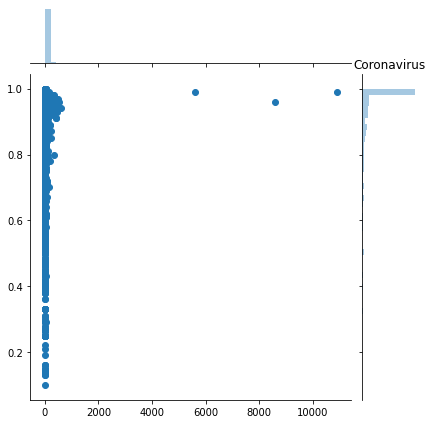

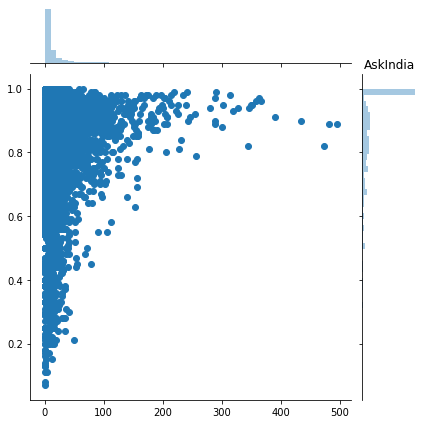

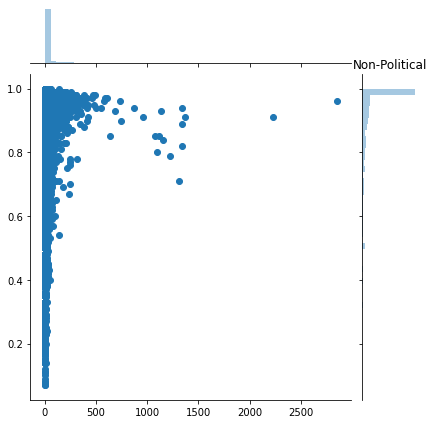

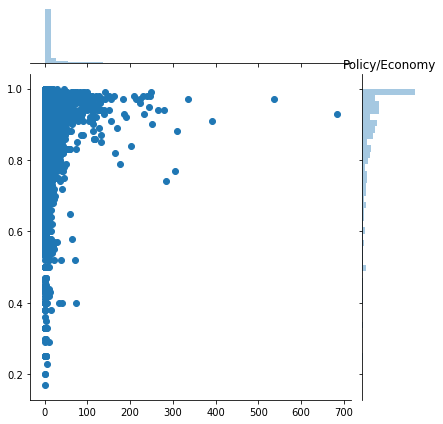

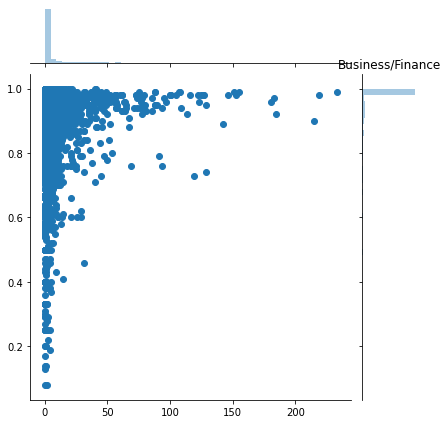

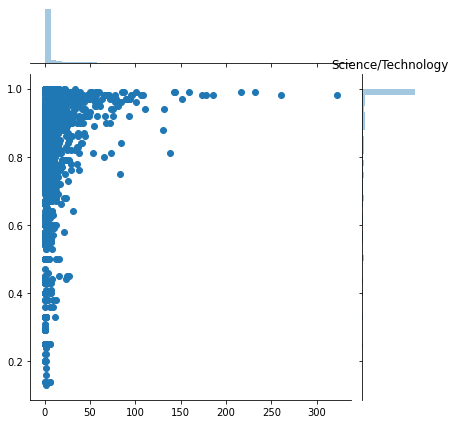

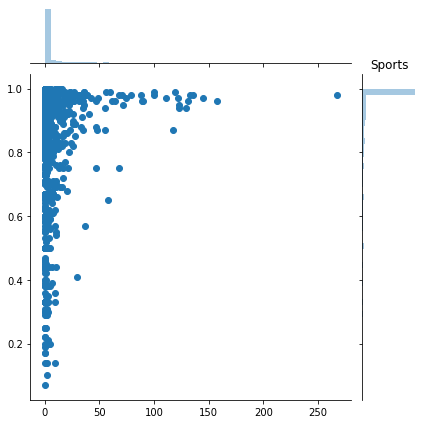

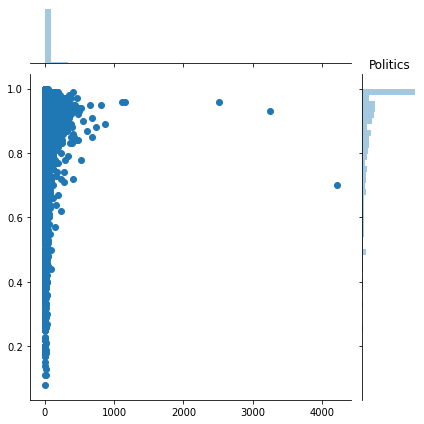

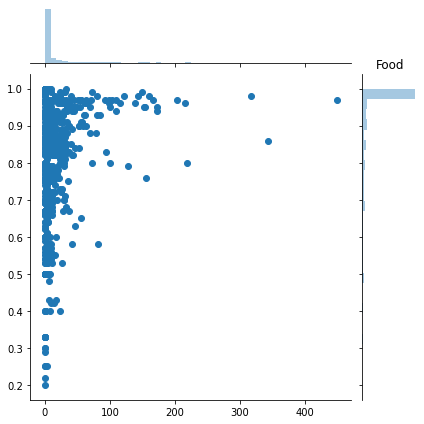

In [26]:
for x in flair_list:
  uratio=[]
  num_comments=[]
  for i in df.index:
    if(df['Flair'][i]==x):
      uratio.append(df['upvote_ratio'][i])
      num_comments.append(df['num_comments'][i])
  sns.jointplot(y=uratio,x=num_comments,kind='scatter',height=6)
  plt.title(x)

This is depiction of the flair with the most number of comments thus far. It may be a little skewed, as the dataset is unevenly distributed, with flairs like Policy/Economy and Politics have more than 4 times the amount of posts as some other flairs.


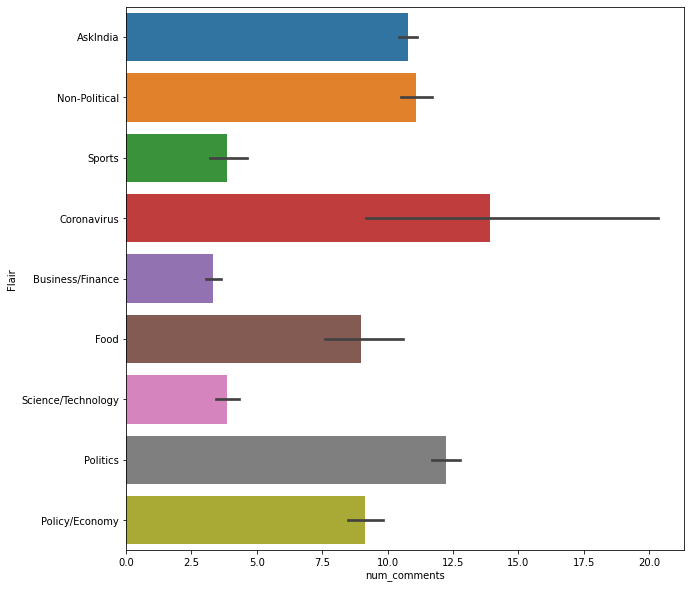

In [28]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(y=df['Flair'],x=df['num_comments'],data=df,ax=ax)


A depiction of the number of posts that are tagged as (over 18) in each flair.


[12, 101, 200, 9, 53, 36, 6, 77, 15]


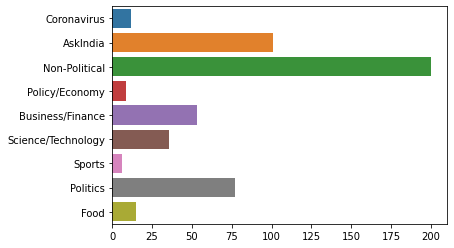

In [21]:
over18=[0,0,0,0,0,0,0,0,0]
for i in df.index:
    if((df['Flair'][i] in flair_list) and (df['Over 18'][i]==True)):
      over18[flair_list.index(df['Flair'][i])]+=1
print(over18)
sns.barplot(x=over18,y=flair_list)


In [0]:
countflair=[0,0,0,0,0,0,0,0,0]
agg_uratio=[0,0,0,0,0,0,0,0,0]
agg_score=[0,0,0,0,0,0,0,0,0]
for i in df.index:
    if((df['Flair'][i] in flair_list)):
      countflair[flair_list.index(df['Flair'][i])]+=1
      agg_uratio[flair_list.index(df['Flair'][i])]+=df['upvote_ratio'][i]
      agg_score[flair_list.index(df['Flair'][i])]+=df['Score'][i]


In [0]:
for i in agg_uratio:
  agg_score[agg_uratio.index(i)]/=countflair[agg_uratio.index(i)]
  agg_uratio[agg_uratio.index(i)]/=countflair[agg_uratio.index(i)]


A visualization of the aggregate score for each flair. 
Since the Politics flair has the highest aggregate score, it is likely that the majority of the subreddit itself leans toward a certain political inclination.

Text(0.5, 1.0, 'Aggregate Score for each flair')

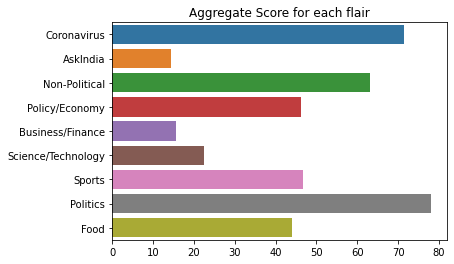

In [29]:
sns.barplot(x=agg_score,y=flair_list)
plt.title('Aggregate Score for each flair')

A representation of the aggregate upvote ratio for each flair, a more accurate representation of the popularity of a flair, as the range of the upvote ratio lies between 0 to 1.

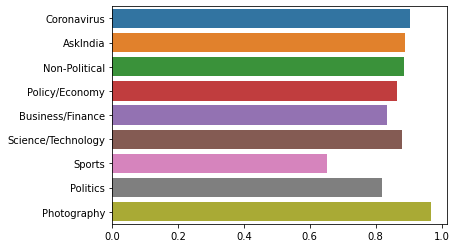

In [0]:
sns.barplot(x=agg_uratio,y=flair_list)